In [11]:
from scipy.spatial import distance
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Input files 
region = "regionE"
# processed expression matrix split by regions 
count_file = pd.read_csv(region+"_sct_240211.csv", header = 0, index_col = 0)
count = count_file.T
# cell type ident for each cell 
celltype = pd.read_csv(region+"_celltypes_240418.csv")
# X, Y, Z coordinate of each cell 
meta = pd.read_csv(region+"_metadata_240418.csv")

In [4]:
# look at flu genes -- normalized values for convex hull plotting only, otherwise use expression values 
flu = ['NP.gRNA', 'NS1.gRNA']
flu_exp = count[flu].sum(axis=1)

In [5]:
# RUN HERE for UNINFECTED NEIGHBORHOOD

# uninfected neighborhood 
ind_uninfect = flu_exp < 0.5
uninfect_count = count.loc[ind_uninfect]
meta_uninfect = meta.loc[ind_uninfect]
cell_uninfect = celltype.loc[ind_uninfect]

# find coordinates of cells of interest
uninfect_coord = pd.concat([meta_uninfect['x'],meta_uninfect['y']], axis=1)
in_coord = np.array(uninfect_coord)
#pairwise distance between infected cells to all cells
a = np.linalg.norm(in_coord- in_coord[:,None], axis = -1) 

# sort distance from closest to furthest 
idx = np.argsort(a, 1)[:, 0:15]

In [ ]:
# RUN HERE for INFECTED NEIGHBORHOOD

ind_infect = flu_exp > 1.2
infect_count = count.loc[ind_infect]
meta_infect = meta.loc[ind_infect]
cell_infect = celltype.loc[ind_infect]

# find coordinates of cells of interest
allcells_coord = pd.concat([meta['x'],meta['y']], axis=1)
infect_coord = pd.concat([meta_infect['x'],meta_infect['y']], axis=1)
all_coord = np.array(allcells_coord)
in_coord = np.array(infect_coord)

#pairwise distance between infected cells to all cells
a = np.linalg.norm(all_coord- in_coord[:,None], axis = -1) 

# sort distance from closest to furthest 
idx = np.argsort(a, 1)[:, 0:15]


In [6]:
blank = np.zeros((len(idx), 21));
window_cell_freq = pd.DataFrame(np.zeros((len(idx), 21)), columns = ["AirwayEpithelial",
               "AT1",
               "AT2",
               "BronchoFibroblast",
               "AlveolarFibroblast",
               "MyoFB",
               "Pericyte",
               "SMC",
               "Artery",
               "Vein",
               "Capillary",
               "AlveolarMac",
               "InterstitialMac",
               "InflamMac",
               "PatrolMac",
               "mucosalDC",
               "perivascularDC",
               "pDC",
               "Neutrophil",
               "Tcell",
               "Bcell"])

window_cell_freq

,AirwayEpithelial,AT1,AT2,BronchoFibroblast,AlveolarFibroblast,MyoFB,Pericyte,SMC,Artery,Vein,...,AlveolarMac,InterstitialMac,InflamMac,PatrolMac,mucosalDC,perivascularDC,pDC,Neutrophil,Tcell,Bcell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(len(idx)):
    window_ind = idx[i]
    window = celltype.iloc[window_ind,:]    
    frac = window['x'].value_counts(sort=False)/len(window)
    window_cell = window['x'].unique()
    for j in range(len(window_cell)):
        window_cell_freq.loc[i, window_cell[j]] = frac[j]
window_cell_freq  

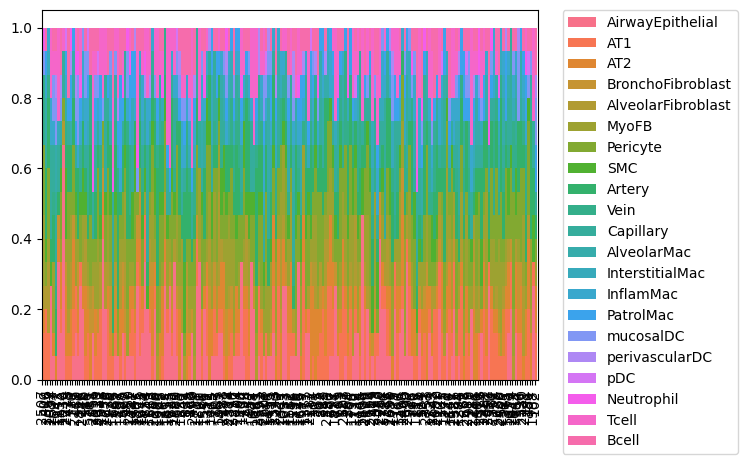

In [12]:
import random
ind = random.sample(range(0, len(idx)), 200)
all_plaque_comp = window_cell_freq.loc[ind,]
comp_sort = all_plaque_comp
comp_sort.plot(kind='bar', stacked=True, color = sns.color_palette("husl", 21), align = 'edge', width = 1)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig("250202_uninfected_rand_comp_airway.pdf", format='pdf')